https://people.revoledu.com/kardi/tutorial/Python/Video+Analysis+using+OpenCV-Python.html#:~:text=Video%20Analysis%20using%20OpenCV%2DPython&text=This%20tutorial%20is%20a%20practice,numpy%20and%20math%20modules%20installed.

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [50]:
cap = cv2.VideoCapture('..//assets//videos//juggling.mp4')
vs = cap

In [51]:
w = int(vs.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vs.get(cv2.CAP_PROP_FRAME_HEIGHT))
print('Height and Width of the frame {} {}'.format(h, w))

Height and Width of the frame 2160 3840


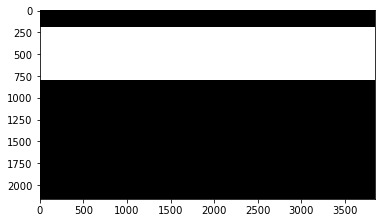

In [52]:
base_mask = np.zeros((h, w))
base_mask[200:800] = 1
plt.imshow(base_mask, cmap = 'gray')
plt.show()

In [53]:
hsv_lower = (0, 48, 0)
hsv_higher = (180, 255, 75)

In [54]:
def processAndShow(vs, func = None):
        
    while vs.isOpened():
        ret, fr = vs.read()
        
        if ret == False:
            break
        f = 0.2
        fr = cv2.resize(fr, (int(vs.get(cv2.CAP_PROP_FRAME_WIDTH)*f), int(vs.get(cv2.CAP_PROP_FRAME_HEIGHT)*f)), fx = f, fy = f)
        if func is not None:
            fr = func(fr)
        
        cv2.imshow('frame', fr)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
#     vs.release()
    cv2.destroyAllWindows()

In [55]:
def proc(fr, backSub = cv2.createBackgroundSubtractorMOG2(), detector = cv2.SimpleBlobDetector()):
    fr_ = backSub.apply(fr)
    
#     fr_ = cv2.erode(fr_, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations = 5)
#     fr_ = cv2.dilate(fr_, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7)), iterations = 5)
    
    circles = cv2.HoughCircles(fr_, cv2.HOUGH_GRADIENT, 1.2, 500)
    # ensure at least some circles were found
    if circles is not None:
        # convert the (x, y) coordinates and radius of the circles to integers
        circles = np.round(circles[0, :]).astype("int")
        # loop over the (x, y) coordinates and radius of the circles
        for (x, y, r) in circles:
            print(r)
            # draw the circle in the output image, then draw a rectangle
            # corresponding to the center of the circle
            cv2.circle(fr, (x, y), r, (0, 255, 0), 4)
            cv2.rectangle(fr, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

    return fr

In [ ]:
processAndShow(vs, proc)

185
145
157
123
145
124
134
156
154
177
175
